# Hawaiian Stopwords

This goal of this project is to create a list of stopwords for the Hawaiian language. In NLP (Natural Language Processing), stopwords are the most commonly used words. In English, these are words like "and" and "the" - filtering a text of these words can help reduce noise and improve NLP algorithms' accuracy.

This project will arbitrarily use five different Hawaiian language newspapers to create the list. First, I will tokenize the words from the newspapers. Then, I will count each term's frequency of occurrence and place them in a data frame. Finally, I will graph the data to find cutoff points based on a presumed geometric asymptote convergence location. I will ultimately use the discretion of my language domain knowledge to supersede what makes the cutoff. Here are the assumptions:
1. That five newspapers is a large enough corpus
2. That the language used in these periodicals is still relevant to today (the dates of the newspapers will be varied and range from 1834 through 1902)
3. That the word count graph is negative exponential

## The Distribution

It would be nice to later justify our findings somehow. Below is a graph of ordered word frequency for a corpus of english newspapers. This list of words is void of stopwords as defined by the nltk corpus, so, we can remove stopwords from our hawaiian corpus and hope the distribution is similar.

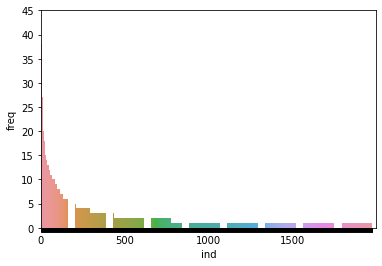

In [1]:
import project7Sup

## Extraction


Let's use pythons docx library which will allow us to manipulate word document text with python code.

In [1]:
import docx

def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return '\n'.join(fullText)

npTextOne = getText("Ka Elele Hawaii Buke 4 Pepa 1 Aoao 1 Iune 8 1848.docx")

In [3]:
print(npTextOne[:100])

KA ELELE HAWAII.
 
BUKE 4. Honolulu, Oahu, Iune 8, 1848. PEPA 1.
 
Olelo Hoike na ke Kuhina no ke Ao


## Preprocessing and Tokenizing

We're going to make a function called cleanText() that removes punctuation and numbers from the text. We will combine this to the getText() function that we created previously and call the split() method to create a list of individual words for each newspaper.

In [4]:
import string

noThanks = string.punctuation
noThanks += "1234567890"

def cleanText(someText):
    someText = someText.replace('\n',' ') # new lines
    temp = ""
    for i in someText:
        if i in noThanks:
            temp += " "
        else:
            temp += i
            
    return temp

In [5]:
npWordListOne = cleanText(getText("Ka Elele Hawaii Buke 4 Pepa 1 Aoao 1 Iune 8 1848.docx")).lower().split()

In [6]:
npWordListOne[:10]

['ka',
 'elele',
 'hawaii',
 'buke',
 'honolulu',
 'oahu',
 'iune',
 'pepa',
 'olelo',
 'hoike']

In [7]:
npWordListTwo = cleanText(getText("Ka Lama Hawaii Makahiki 1 Helu 1 Aoao 1 Feberuari 14 1834.docx")).lower().split()

In [8]:
npWordListThree = cleanText(getText("Ka Makaainana Buke 11 Helu 7 Aoao 1 Feberuari 13 1899.docx")).lower().split()

By the way, this issue of Ke Kiai ended in a section of English so I trimmed this before saving to the .docx

In [9]:
npWordListFour = cleanText(getText("Ke Kiai Buke 1 Helu 3 Aoao 1 Sepatemaba 11 1902.docx")).lower().split()

In [10]:
npWordListFive = cleanText(getText("Nupepa Kuokoa Buke 1 Helu 1 Okakopa 1861.docx")).lower().split()

## Making the dataframe


We're going to combine all five lists of words, count the number of occurances, place in a pandas dataframe and reset the index (and make a dummy index "ind" to use as our graphs' x-axis)

In [11]:
corpusList = npWordListOne + npWordListTwo + npWordListThree + npWordListFour + npWordListFive

Counting the number of occurances in the corpus

In [12]:
corpusDict = {}

for i in corpusList:
    if i in corpusDict:
        corpusDict[i] +=1
    else:
        corpusDict[i] = 1

In [13]:
for i in range(5):
    print(list(corpusDict.keys())[i], ":",corpusDict[list(corpusDict.keys())[i]])

ka : 3187
elele : 21
hawaii : 132
buke : 31
honolulu : 64


Making the dataframe

In [14]:
import pandas as pd
import numpy as np

df = pd.DataFrame(data=[[i, corpusDict[i]] for i in corpusDict ], columns=["word", "freq"])

Ordering by frequency, setting the index, and making the dummy column

In [15]:
df.sort_values(by="freq",ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df["ind"] = np.arange(0,3446)

## Analyzing the data


In [16]:
df.head()

,word,freq,ind
0,ka,3187,0
1,i,2838,1
2,o,2584,2
3,a,2040,3
4,e,1745,4


In [17]:
df.tail()

,word,freq,ind
3441,haia,1,3441
3442,mauleule,1,3442
3443,hamakuapoko,1,3443
3444,tempsky,1,3444
3445,wepa,1,3445


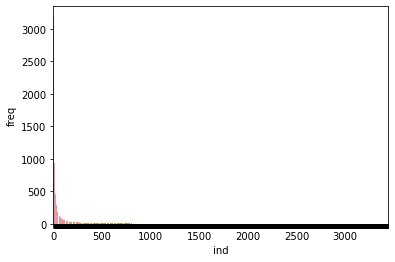

In [18]:
import seaborn as sns

g = sns.barplot(data=df, y="freq", x="ind")

for ind, label in enumerate(g.get_xticklabels()):
    if ind % 500 == 0:  # x ticks
        label.set_visible(True)
    else:
        label.set_visible(False)


Let's zoom in

[(0, 800)]

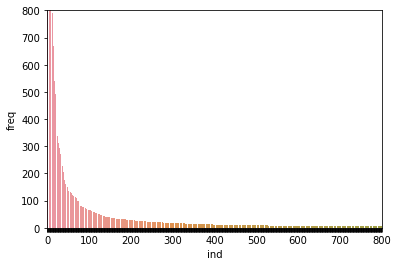

In [19]:
g = sns.barplot(data=df, y="freq", x="ind")

for ind, label in enumerate(g.get_xticklabels()):
    if ind % 100 == 0:  # x ticks
        label.set_visible(True)
    else:
        label.set_visible(False)
g.set(ylim=(0, 800))
g.set(xlim=(0, 800))


## Finishing up

So the cutoff point is the final decider in what does and doesn't make the list. After playing around with the values I finalized the cutoff at a frequency of 110. I tried values between 80 and 200 and determined that 110 gives me a graph that is most similar to the validation graph (located at the introduction of the project). 

[(0, 2000)]

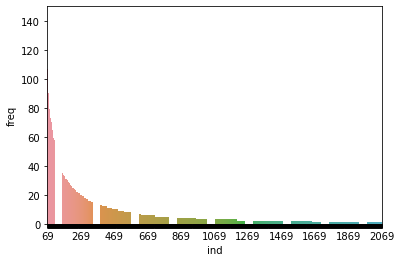

In [20]:
finalDF = df[df["freq"]<=110]

g = sns.barplot(data=finalDF, y="freq", x="ind")

for ind, label in enumerate(g.get_xticklabels()):
    if ind % 200 == 0:  # x ticks
        label.set_visible(True)
    else:
        label.set_visible(False)
g.set(ylim=(0, 150))
#g.set(xlim=(0, 3500))
g.set(xlim=(0, 2000))


In [21]:
df[df["freq"]<=110]

,word,freq,ind
69,maikai,110,69
70,make,110,70
71,wa,107,71
72,kula,106,72
73,au,98,73
...,...,...,...
3441,haia,1,3441
3442,mauleule,1,3442
3443,hamakuapoko,1,3443
3444,tempsky,1,3444


In [22]:
stopwords = list(df[df["freq"]>110]["word"])

Our list of stopwords

In [23]:
stopwords

['ka',
 'i',
 'o',
 'a',
 'e',
 'na',
 'ke',
 'no',
 'ia',
 'ua',
 'ana',
 'me',
 'mai',
 'ma',
 'he',
 'mea',
 'la',
 'aku',
 'ai',
 'hoi',
 'keia',
 'nei',
 'mau',
 'ko',
 'kona',
 'lakou',
 'nui',
 'poe',
 'kekahi',
 'loa',
 'ae',
 'oia',
 'iho',
 'pono',
 'hana',
 'aole',
 'kahi',
 'pau',
 'ole',
 'hiki',
 'ike',
 'kakou',
 'kanaka',
 'hou',
 'olelo',
 'aina',
 'ano',
 'noho',
 'makou',
 'manao',
 'loaa',
 'wale',
 'hele',
 'hale',
 'like',
 'wahi',
 'hawaii',
 'ina',
 'iloko',
 'paha',
 'aupuni',
 'eia',
 'oukou',
 'oe',
 'kela',
 'u',
 'moku',
 'ku',
 'pu']

The length of the list

In [24]:
len(stopwords)

69

## Conclusion


The Stopwords of a language are powerful. Knowing a languages' Stopwords can amplify algorithms like Cosine Similarity and Malik Summarization ( See my Project 3 to see a text summarization technique). To create a list of Stopwords for the Hawaiian language, we chose a cutoff of our word/freq list based on two graphs. The final vs. validation graphs' compared word/freq void of stop words (one for Hawaiian and one for the control - English). The similarity of the graphs validated the cutoff point that we chose of frequency 110 for this corpus.

To run through what we did, we preprocessed the corpus by removing punctuation, numbers and made it case insensitive. We tokenized, found word frequency, and put the data in a data frame. This data frame helped us to sort the values and create graphs easily. I did extra work on the back end in a file called project7Sup.py that delivers the validation word/freq graph for an English corpus (void of stopwords). This served as the control that helped find the cutoff point where too much frequency decided the stopword list. However, there are other things we could have done.

Some words like Kaua (us two), maikai (good), and au (me) did not make our list. After analyzing the data frame, a cutoff point of frequency 79 intuitively makes a better list (though it defies the validation graph). To improve upon the list, we could have increased the number of newspapers used, used more modern texts, or compared Stopword/frequency graphs. We might even have asked for help from Hawaiian language experts to better validate the list, used TF - IDF (Term Frequency - Inverse Document Frequency) to somehow select words, or simply translated the list of English stopwords into Hawaiian. Using my domain knowledge of the Hawaiian language, I intuitively validated the Stopwords list and found it a decent list and a good starting point for better lists'. I am open to continuing the project if a better list of Stopwords is needed by myself or others interested in NLP on the Hawaiian language.